In [2]:
import numpy as np
import os
from numpy import genfromtxt
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from scipy import interpolate
import seaborn as sns
cmap1 = sns.color_palette("crest", as_cmap=True)
cmap2 = sns.color_palette("flare", as_cmap=True)
matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',family ='serif')
import cycler

First we need a look up table with all the test informations such that we can post process them easily 

In [3]:
"""Run this part only once """
path = "DamageData/"
os.chdir(path=path)
Specimens = next(os.walk('.'))[1] # Name of all the specimens

In [4]:
def GetData(specimen):
    "Parse data from the DamageData folder"
    os.chdir(specimen)
    Info = pd.read_csv("Info.txt", sep=" ", header=None).to_numpy() # Information
    Pig = Info[0,-1] ; Location = Info[1,-1]; Direction = Info[2,-1]
    ncycles = len(next(os.walk('.'))[2])-2 #Get number of cycles available 
    data = np.hstack([specimen,Pig,Location,Direction,ncycles])
    os.chdir('..')
    return data

In [5]:
"""Cycle through list of specimens and collect data to a dataframe"""
Data = []
for i,specimen in enumerate(Specimens[:]):
    data = GetData(specimen)
    Data.append(data)

names = ['Name','Pig', 'Location', 'Direction', 'Ncycles']
DamageData = pd.DataFrame(Data,columns=names)
DamageData.to_csv('DamageData.csv',index=False) #Save to file

In [6]:
def GetCycle(specimen,n):
    "Get the nth cycle strtech stress data interpolated to regular intervals"
    os.chdir(specimen)
    if os.path.exists(f"{n}.csv") == False:
        os.chdir('..')
        return np.zeros(1)
    else:
        data = np.genfromtxt(f"{n}.csv",delimiter=',',skip_header=1)
        lams = np.linspace(1,1.4+(n-1)/10,200)
        # interp = interpolate.CubicSpline(data[:,0],data[:,1])
        stress_interp = np.interp(lams,data[:,0],data[:,1])
        # stress_interp = interp(lams)
        os.chdir('..')
        return stress_interp

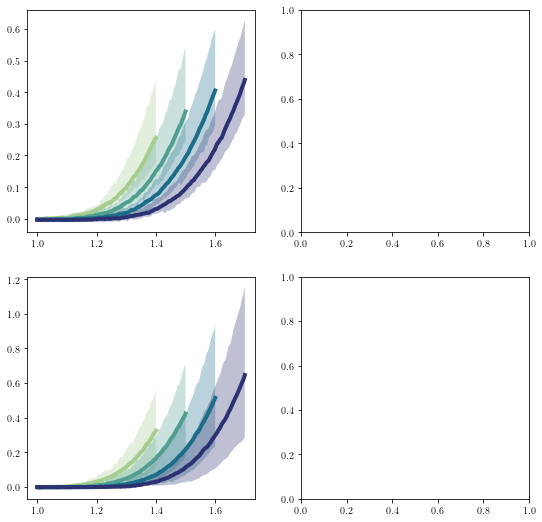

In [8]:
fig, ax = plt.subplots(2,2,figsize=(9,9))
ax[0,0].set_prop_cycle(cycler.cycler('color', cmap1(np.linspace(0,1,4)))) 
for n in range(1,5):
    StressStretch = []
    for i,specimen in enumerate(DamageData.loc[DamageData['Location']=='Belly']['Name']):
        data = GetCycle(specimen,n)
        if data.all()==0:
            pass
        else:
            StressStretch.append(data)
    StressStretch = np.asarray(StressStretch)
    lam = np.linspace(1,1.4+(n-1)/10,200)
    avg = np.average(StressStretch,axis=0)
    min = np.min(StressStretch,axis=0)
    max = np.max(StressStretch,axis=0)
    ax[0,0].plot(lam,avg,lw=4.0)
    ax[0,0].fill_between(lam,min,max,alpha=0.3)


ax[1,0].set_prop_cycle(cycler.cycler('color', cmap1(np.linspace(0,1,4)))) 
for n in range(1,5):
    StressStretch = []
    for i,specimen in enumerate(DamageData.loc[DamageData['Location']=='Breast']['Name']):
        data = GetCycle(specimen,n)
        if data.all()==0:
            pass
        else:
            StressStretch.append(data)
    StressStretch = np.asarray(StressStretch)
    lam = np.linspace(1,1.4+(n-1)/10,200)
    avg = np.average(StressStretch,axis=0)
    min = np.min(StressStretch,axis=0)
    max = np.max(StressStretch,axis=0)
    ax[1,0].plot(lam,avg,lw=4.0)
    ax[1,0].fill_between(lam,min,max,alpha=0.3)

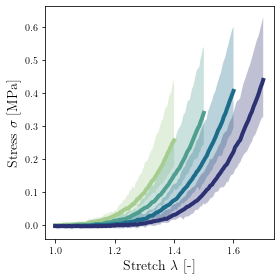

In [13]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.set_prop_cycle(cycler.cycler('color', cmap1(np.linspace(0,1,4)))) 
for n in range(1,5):
    StressStretch = []
    for i,specimen in enumerate(DamageData.loc[DamageData['Location']=='Belly']['Name']):
        data = GetCycle(specimen,n)
        if data.all()==0:
            pass
        else:
            StressStretch.append(data)
    StressStretch = np.asarray(StressStretch)
    lam = np.linspace(1,1.4+(n-1)/10,200)
    avg = np.average(StressStretch,axis=0)
    min = np.min(StressStretch,axis=0)
    max = np.max(StressStretch,axis=0)
    ax.plot(lam,avg,lw=4.0)
    ax.fill_between(lam,min,max,alpha=0.3)

ax.set_ylabel(r'Stress $\sigma$ [MPa]',fontsize=14)
ax.set_xlabel(r'Stretch $\lambda$ [-]',fontsize=14)
# ax.set_title(f'Belly',fontsize=16)
plt.tight_layout()
plt.savefig('Belly_Damage',dpi=300)

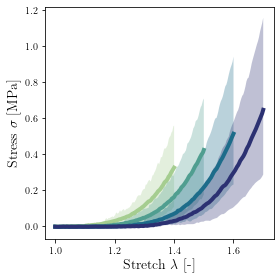

In [14]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.set_prop_cycle(cycler.cycler('color', cmap1(np.linspace(0,1,4)))) 
for n in range(1,5):
    StressStretch = []
    for i,specimen in enumerate(DamageData.loc[DamageData['Location']=='Breast']['Name']):
        data = GetCycle(specimen,n)
        if data.all()==0:
            pass
        else:
            StressStretch.append(data)
    StressStretch = np.asarray(StressStretch)
    lam = np.linspace(1,1.4+(n-1)/10,200)
    avg = np.average(StressStretch,axis=0)
    min = np.min(StressStretch,axis=0)
    max = np.max(StressStretch,axis=0)
    ax.plot(lam,avg,lw=4.0)
    ax.fill_between(lam,min,max,alpha=0.3)

ax.set_ylabel(r'Stress $\sigma$ [MPa]',fontsize=14)
ax.set_xlabel(r'Stretch $\lambda$ [-]',fontsize=14)
# ax.set_title(f'Breast',fontsize=16)
plt.tight_layout()
plt.savefig('Breast',dpi=300)